# Training Mnist Classifier with 99.99% accuracy in 7 batches

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 13.3MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 194kB 53.2MB/s 
     |████████████████████████████████| 1.1MB 48.0MB/s 
     |████████████████████████████████| 61kB 10.4MB/s 
Mounted at /content/gdrive


In [3]:
from fastai.vision.all import  *

In [5]:
path = untar_data(URLs.MNIST)

In [25]:
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/testing'),Path('/root/.fastai/data/mnist_png/training')]

In [26]:
(path/'testing').ls()

(#10) [Path('/root/.fastai/data/mnist_png/testing/8'),Path('/root/.fastai/data/mnist_png/testing/3'),Path('/root/.fastai/data/mnist_png/testing/1'),Path('/root/.fastai/data/mnist_png/testing/0'),Path('/root/.fastai/data/mnist_png/testing/9'),Path('/root/.fastai/data/mnist_png/testing/7'),Path('/root/.fastai/data/mnist_png/testing/5'),Path('/root/.fastai/data/mnist_png/testing/6'),Path('/root/.fastai/data/mnist_png/testing/2'),Path('/root/.fastai/data/mnist_png/testing/4')]

In [7]:
(path/'training').ls()

(#10) [Path('/root/.fastai/data/mnist_png/training/8'),Path('/root/.fastai/data/mnist_png/training/3'),Path('/root/.fastai/data/mnist_png/training/1'),Path('/root/.fastai/data/mnist_png/training/0'),Path('/root/.fastai/data/mnist_png/training/9'),Path('/root/.fastai/data/mnist_png/training/7'),Path('/root/.fastai/data/mnist_png/training/5'),Path('/root/.fastai/data/mnist_png/training/6'),Path('/root/.fastai/data/mnist_png/training/2'),Path('/root/.fastai/data/mnist_png/training/4')]

In [8]:
dls = ImageDataLoaders.from_folder((path/'training'),valid_pct=0.2)

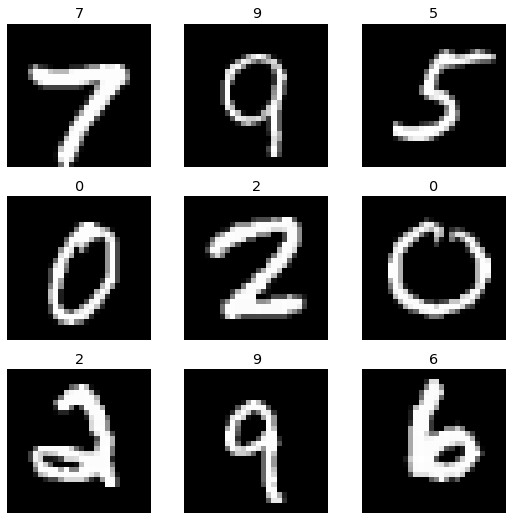

In [9]:
dls.show_batch()

In [10]:
learn = cnn_learner(dls,resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


SuggestedLRs(lr_min=0.02089296132326126, lr_steep=0.007585775572806597)

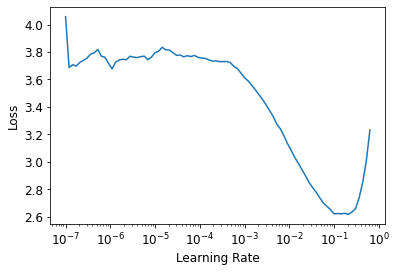

In [11]:
learn.lr_find()

In [14]:
lr_min = 0.020
lr_steep = 0.0075

In [17]:
learn.fit_one_cycle(7,lr_max=slice(lr_steep,lr_min))

epoch,train_loss,valid_loss,error_rate,time
0,0.215730,0.170231,0.045917,01:20
1,0.167989,0.113260,0.028167,01:19
2,0.146325,0.102602,0.027083,01:19
3,0.083631,0.057164,0.016500,01:19
4,0.050371,0.038971,0.011083,01:18
5,0.033695,0.029257,0.008250,01:18
6,0.026903,0.027901,0.008167,01:18


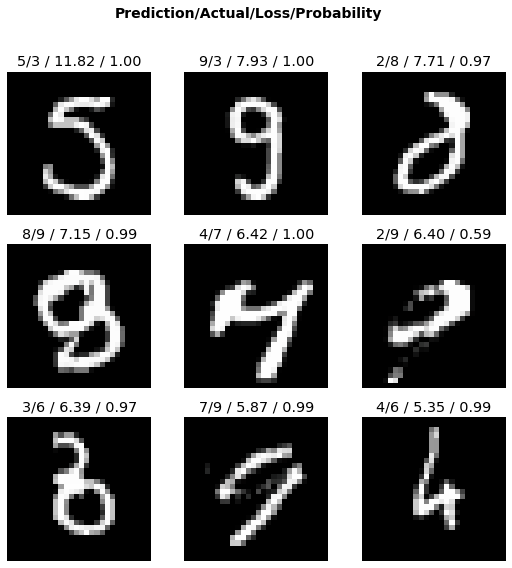

In [19]:
interip = ClassificationInterpretation.from_learner(learn)
interip.plot_top_losses(9)

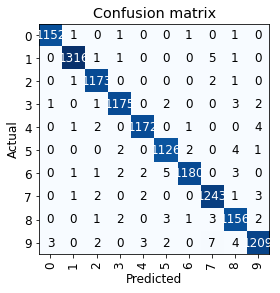

In [20]:
interip.plot_confusion_matrix()b

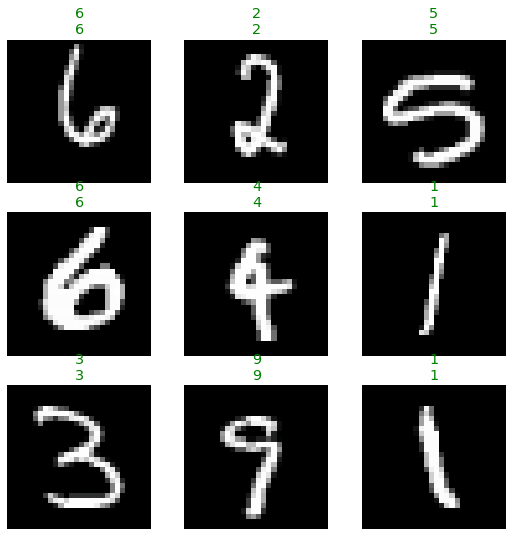

In [21]:
learn.show_results()

In [32]:
from fastai.vision.widgets import *

In [33]:
cleaner = ImageClassifierCleaner(learn)

In [34]:
cleaner

In [42]:
%cd /content

/content


In [44]:
import joblib
joblib.dump(learn,'export.pkl')

['export.pkl']

/content
